In [5]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
#import pandas as pd
import healpy as hp
import time
import warnings
from pixell import reproject
#from classy import Class
%matplotlib inline
#import s1 
import ST
from scipy.integrate import trapz

In [6]:

SMALL_SIZE = 12
MEDIUM_SIZE = 17
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [7]:
cmb_map = hp.read_map("/Volumes/Arefe/TMP_IMPORTANT/maps/COM_CMB_IQU-smica_2048_R3.00_full.fits" , field=0)

In [8]:
nosz_map = hp.read_map("/Volumes/Arefe/TMP_IMPORTANT/maps/COM_CMB_IQU-smica-nosz_2048_R3.00_full.fits", field=0)

In [ ]:
hp.mollview(cmb_map)

In [ ]:
hp.mollview(nosz_map)

In [5]:
mask = hp.read_map("/Volumes/Arefe/TMP_IMPORTANT/maps/COM_Mask_CMB-Inpainting-Mask-Int_2048_R3.00.fits")

In [9]:
nside = 1024



In [10]:
lmax = 3*nside -1 
res_rad = hp.nside2resol(nside, arcmin = False)
res_arcmin = hp.nside2resol(nside, arcmin = True)

In [11]:
ell = np.arange(0,lmax+1)
ellsc = 21600/ell
norm= ell * (ell+1) / (2*np.pi)

/var/folders/vj/5ltjqv9d4px7nr3d4mbmk9_m0000gn/T/ipykernel_39855/2172233455.py:2: RuntimeWarning: divide by zero encountered in true_divide
  ellsc = 21600/ell


In [12]:
jmax = 11

In [13]:
cmb_map = hp.ud_grade(cmb_map, nside_out=nside)

In [14]:
nosz_map = hp.ud_grade(nosz_map, nside_out=nside)

In [12]:
mask = hp.ud_grade(mask, nside_out=nside)

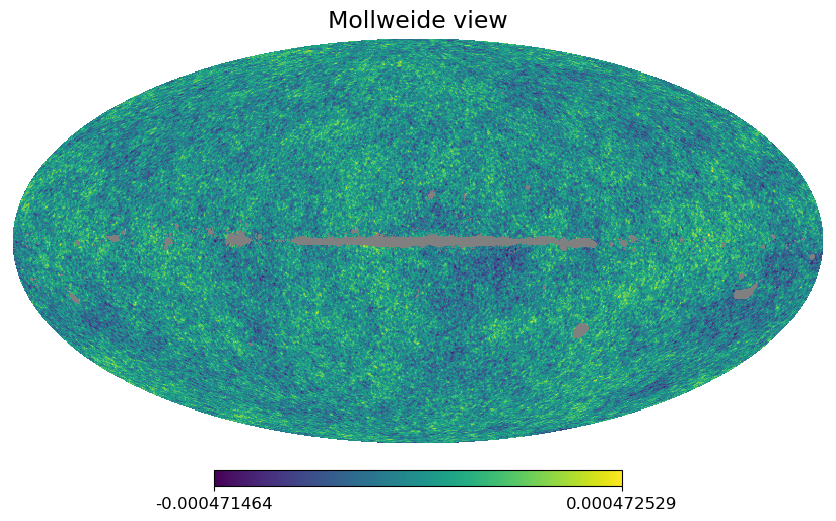

In [13]:
cmb_masked = hp.ma(cmb_map)
cmb_masked.mask = np.logical_not (mask)
hp.mollview(cmb_masked)

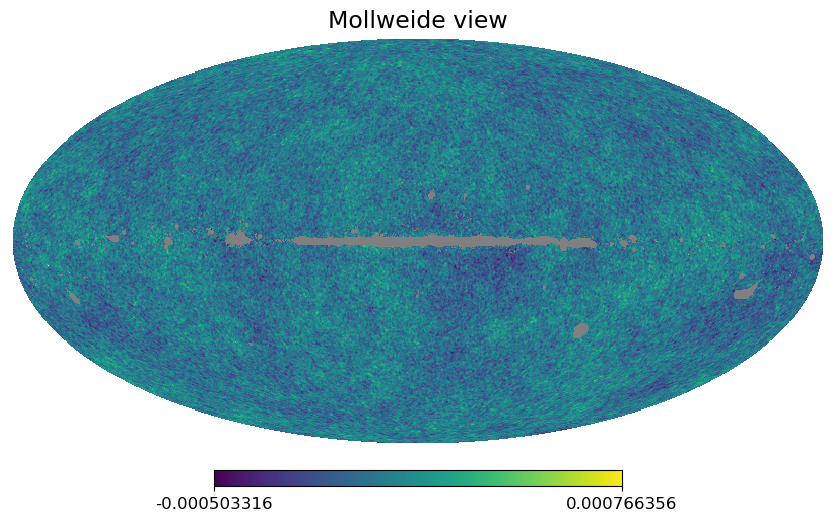

In [14]:
nosz_masked = hp.ma(nosz_map)
nosz_masked.mask = np.logical_not (mask)
hp.mollview(nosz_masked)

In [20]:
theta_bin = 100000
morlet_l_arr = ST.morlet_arr(res_rad , jmax , lmax , theta_bin)

In [21]:
Jf=np.arange(jmax)
scale = 2**Jf*((2*res_arcmin)/0.75)

In [17]:
cmb_s0 = np.mean(cmb_masked)

In [18]:

nosz_s0 = np.mean(nosz_masked)

In [19]:
cmb_s1, cmb_i1 = ST.compS1(cmb_masked
                           , morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7
8
9
10


In [20]:
nosz_s1, nosz_i1 = ST.compS1(nosz_masked, morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7
8
9
10


In [21]:
cmb_s2, _ = ST.compS2(cmb_i1, morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7
8
9
10


In [22]:
nosz_s2, _ = ST.compS2(nosz_i1, morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7
8
9
10


In [26]:

cmb_cl = hp.anafast(cmb_map)

In [27]:
nosz_cl = hp.anafast(nosz_map)

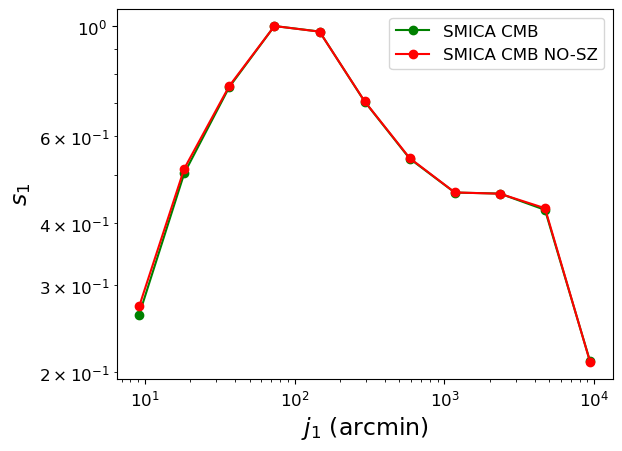

In [23]:
#plt.loglog(ellsc , dl_test)
plt.loglog(scale, np.abs(cmb_s1/cmb_s0)/np.max(np.abs(cmb_s1/cmb_s0)), 'o-', lw=1.5 , color = "green")
plt.loglog(scale, np.abs(nosz_s1/nosz_s0)/np.max(np.abs(nosz_s1/nosz_s0)), 'o-', lw=1.5 , color = "red")
#plt.loglog(ellsc ,cmb_cl*ell*(ell+1)/(2*np.pi))
#plt.loglog(ellsc ,nosz_cl*ell*(ell+1)/(2*np.pi))
plt.ylabel(r"$s_1$")
plt.xlabel(r"$j_1$ (arcmin)")
plt.legend (["SMICA CMB","SMICA CMB NO-SZ"])

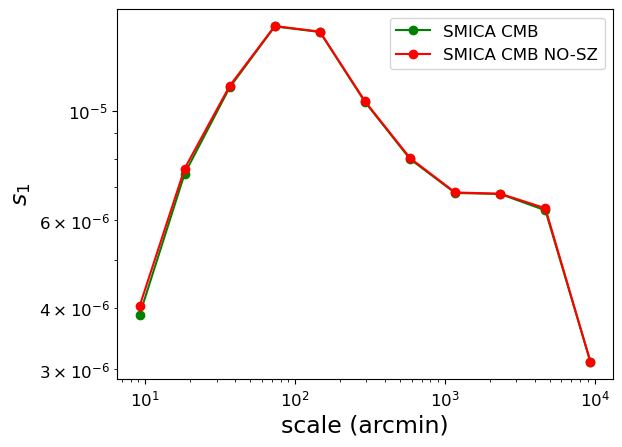

In [25]:
plt.loglog(scale, np.abs(cmb_s1), 'o-', lw=1.5 , color = "green")
plt.loglog(scale, np.abs(nosz_s1), 'o-', lw=1.5 , color = "red")
#plt.loglog(ellsc ,cmb_cl*ell*(ell+1)/(2*np.pi) , color = "green")
#plt.loglog(ellsc ,nosz_cl*ell*(ell+1)/(2*np.pi) , color = "red")
plt.ylabel(r"$s_1$")
plt.xlabel("scale (arcmin)")
plt.legend (["SMICA CMB","SMICA CMB NO-SZ"])

NameError: name 'cmb_cl' is not defined

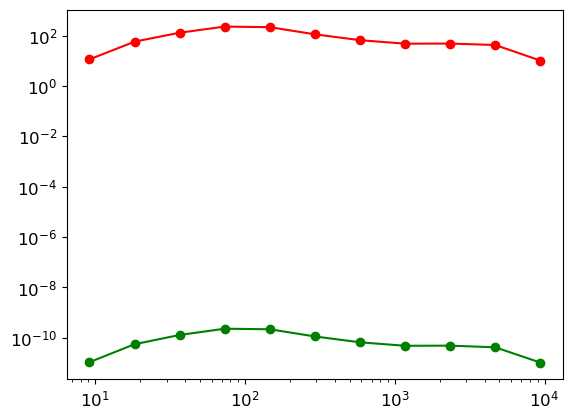

In [52]:
#plt.loglog(ellsc , dl_test)
plt.loglog(scale, (cmb_s1)**2, 'o-', lw=1.5 , color = "green")
plt.loglog(scale, (nosz_s1)**2, 'o-', lw=1.5 , color = "red")
plt.loglog(ellsc ,cmb_cl*ell*(ell+1)/(2*np.pi) , color = "green")
plt.loglog(ellsc ,nosz_cl*ell*(ell+1)/(2*np.pi) , color = "red")
plt.ylabel(r"$s_1$")
plt.xlabel("scale (arcmin)")
plt.legend (["SMICA CMB","SMICA CMB NO-SZ"])

In [ ]:
fig, ax = plt.subplots(1, 5,sharey=True,squeeze=True,figsize=(25,10))
for j in range (5):
    ax[j].plot (scale[j+1:],cmb_s2[j,j+1:],'o-' , color = "green" )
    ax[j].plot (scale[j+1:],nosz_s2[j,j+1:],'o-' , color = "red")
    #ax[j].plot (scale,cmb_s2[j,:]/cmb_s1[j],'o-', alpha = 0.3 , color = "green")
    #ax[j].plot (scale,nosz_s2[j,:]/nosz_s1[j],'o-' , alpha = 0.3 , color = "red")
    ax[j].set_title(r"$j_1$=%d"%j)
    ax[j].set_xlabel(r"$j_2$ (arcmin)")
    ax[j].set_yscale('log')
    #ax[j].set_xscale("log")
ax[0].set_ylabel(r"$s_2$" )
fig.legend(["SMICA CMB","SMICA CMB NO-SZ"], loc='upper center')

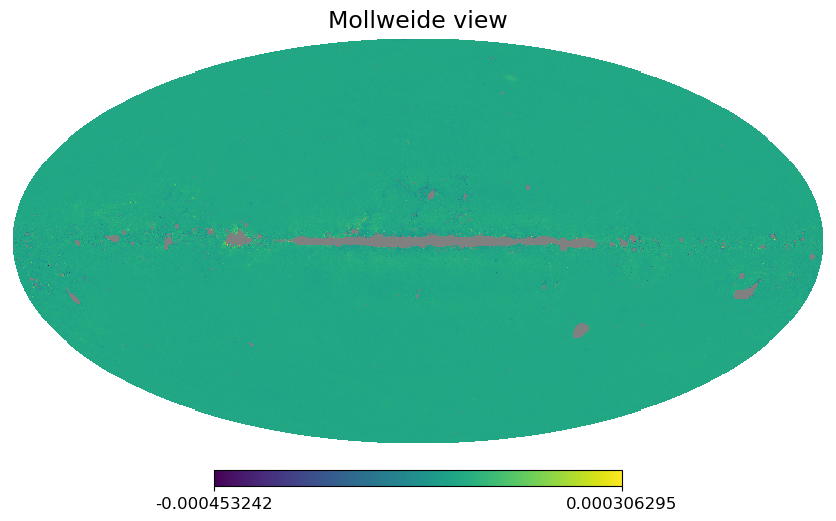

In [29]:
hp.mollview(cmb_masked-nosz_masked)

In [55]:
nosz_s1/nosz_s0

array([3.96189151e+07, 7.55815236e+07, 1.10848759e+08, 1.46353268e+08,
       1.42798303e+08, 1.03351735e+08, 7.95693482e+07, 6.76909962e+07,
       6.80228615e+07, 6.38230047e+07])

In [56]:
cmb_s1/cmb_s0

array([-2510859.79367074, -4866799.79982383, -7283091.92314274,
       -9673118.89632555, -9446948.5821969 , -6827790.97625911,
       -5245117.15755303, -4478073.08004671, -4506318.71061295,
       -4197493.26793131])

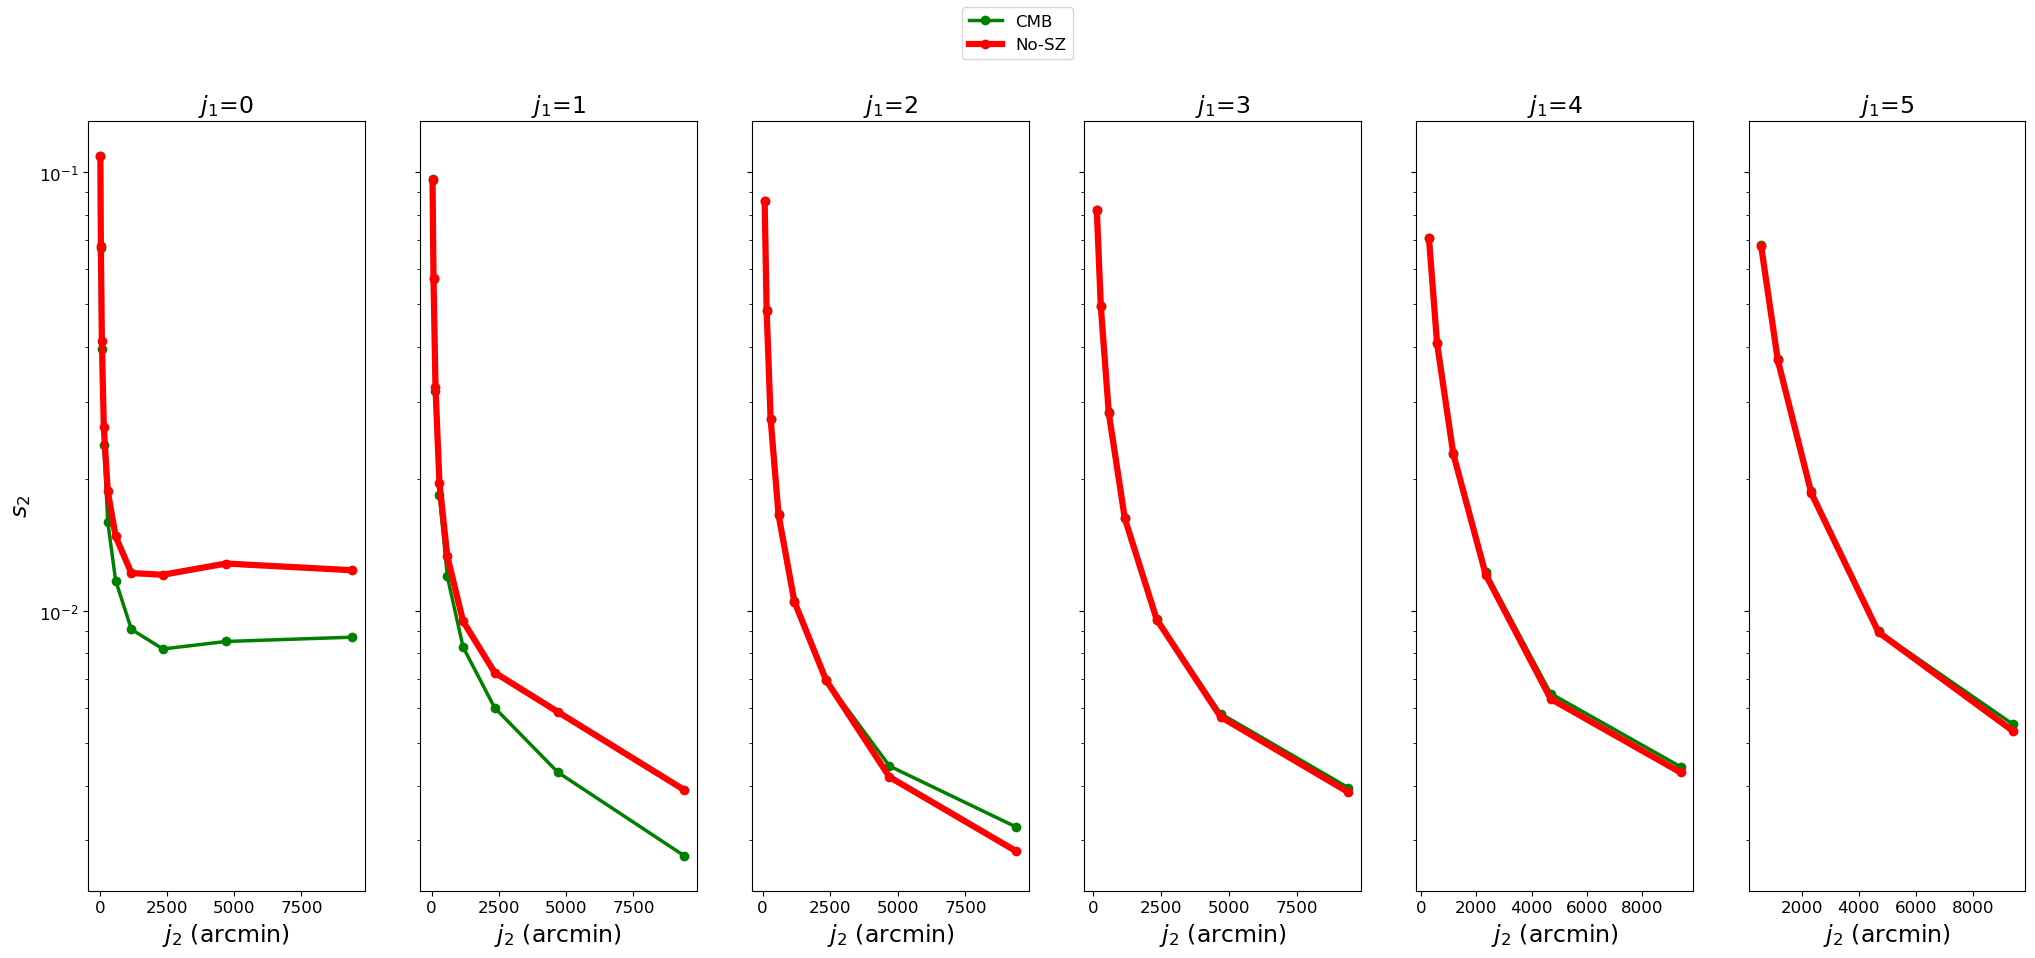

In [30]:
fig, ax = plt.subplots(1, 6,sharey=True,squeeze=True,figsize=(25,10))
for j in range (6):
    ax[j].plot (scale[j+1:],cmb_s2[j,j+1:]/cmb_s1[j],'o-' , color = "green" , lw = 2.5)
    ax[j].plot (scale[j+1:],nosz_s2[j,j+1:]/nosz_s1[j],'o-' , color = "red" , lw = 4.5)
    #ax[j].plot (scale[j+1:],websky_s2[j,j+1:]/websky_s1[j],'o-' , color = "tab:purple" , lw = 2.5)
    #ax[j].plot (scale[j+1:],magneicum_s2[j,j+1:]/magneicum_s1[j],'o-' , color = "darkorange" ,lw = 2.5)
    #ax[j].plot (scale[j+1:],mat_s2[j,j+1:]/mat_s1[j],'o-' , color = "pink" ,lw = 2.5)
    #ax[j].plot (scale,milca_s2[j,:]/milca_s1[j],'o-', alpha = 0.4 , color = "tab:cyan")
    #ax[j].plot (scale,nilc_s2[j,:]/nilc_s1[j],'o-' ,alpha = 0.4, color = "olivedrab" )
    #ax[j].plot (scale,websky_s2[j,:]/websky_s1[j],'o-' , alpha = 0.4 , color = "tab:purple")
    #ax[j].plot (scale,magneicum_s2[j,:]/magneicum_s1[j],'o-' ,  alpha = 0.4, color = "darkorange")
    ax[j].set_title(r"$j_1$=%d"%j)
    ax[j].set_xlabel(r"$j_2$ (arcmin)")
    ax[j].set_yscale('log')
ax[0].set_ylabel(r"$s_2$" )
fig.legend (["CMB","No-SZ"], loc='upper center')
plt.savefig("SZ_sim_S2.pdf")

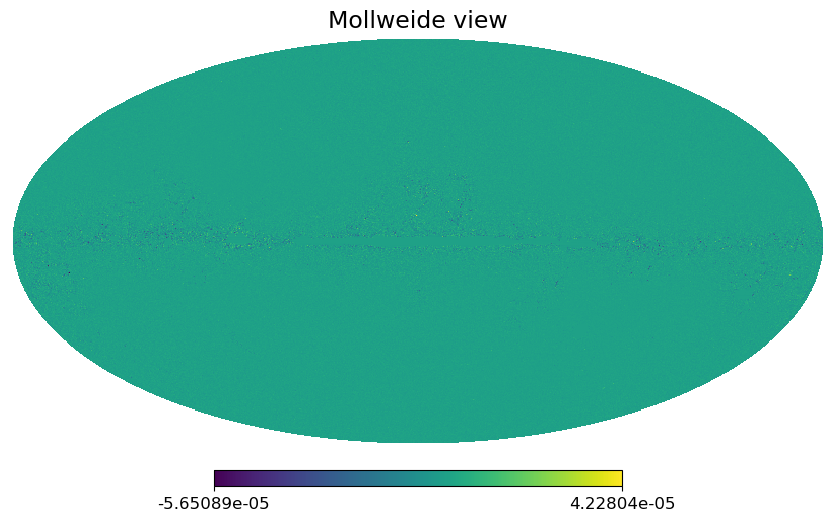

In [32]:
hp.mollview(cmb_i1[1]-nosz_i1[1])

In [15]:
sz_mask = hp.read_map("/Volumes/Arefe/TMP_IMPORTANT/maps/COM_Mask_Compton-SZMap_2048_R2.00.fits")

In [16]:
sz_mask = hp.ud_grade(sz_mask, nside_out=nside)

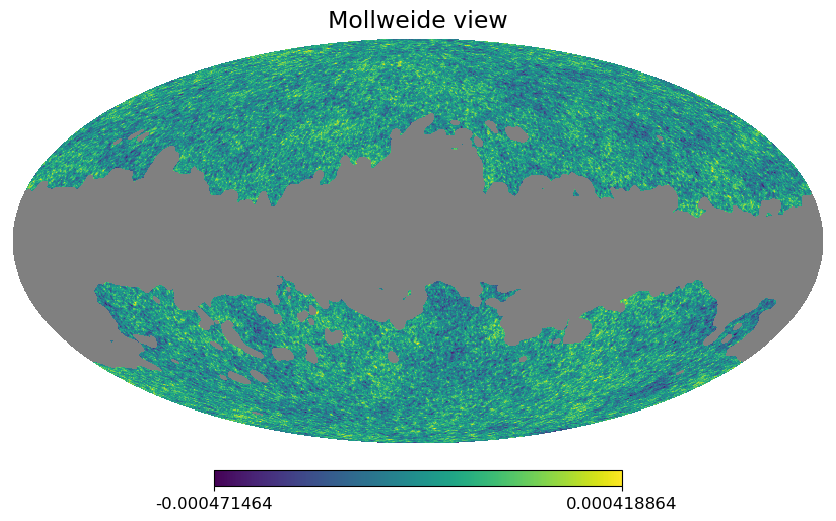

In [17]:
cmb_masked_sz = hp.ma(cmb_map)
cmb_masked_sz.mask = np.logical_not (sz_mask)
hp.mollview(cmb_masked_sz)

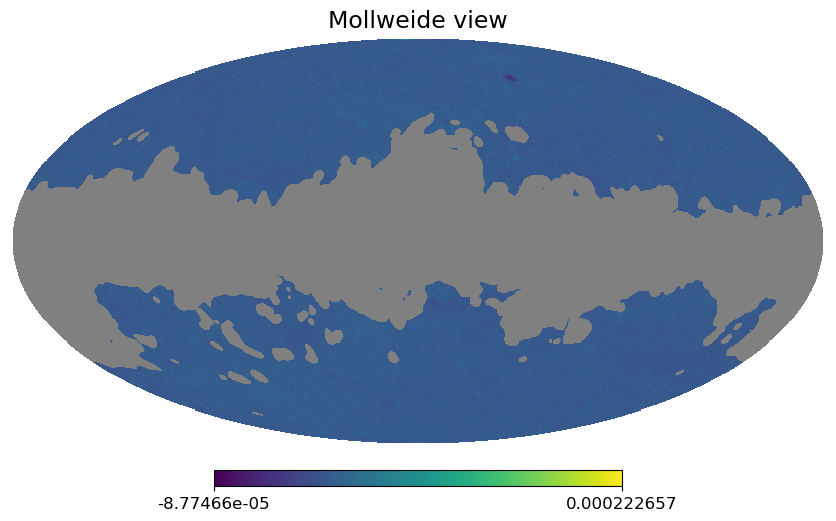

In [28]:
nosz_masked_sz = hp.ma(nosz_map)
nosz_masked_sz.mask = np.logical_not (sz_mask)
hp.mollview(nosz_masked_sz-cmb_masked_sz)

In [22]:
cmb_s1_sz, cmb_i1_sz = ST.compS1(cmb_masked_sz
                           , morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7
8
9
10


In [23]:
nosz_s1_sz, nosz_i1_sz = ST.compS1(nosz_masked_sz, morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7
8
9
10


In [24]:
cmb_s2_sz, _ = ST.compS2(cmb_i1_sz, morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7
8
9
10


In [25]:
nosz_s2_sz, _ = ST.compS2(nosz_i1_sz, morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7
8
9
10


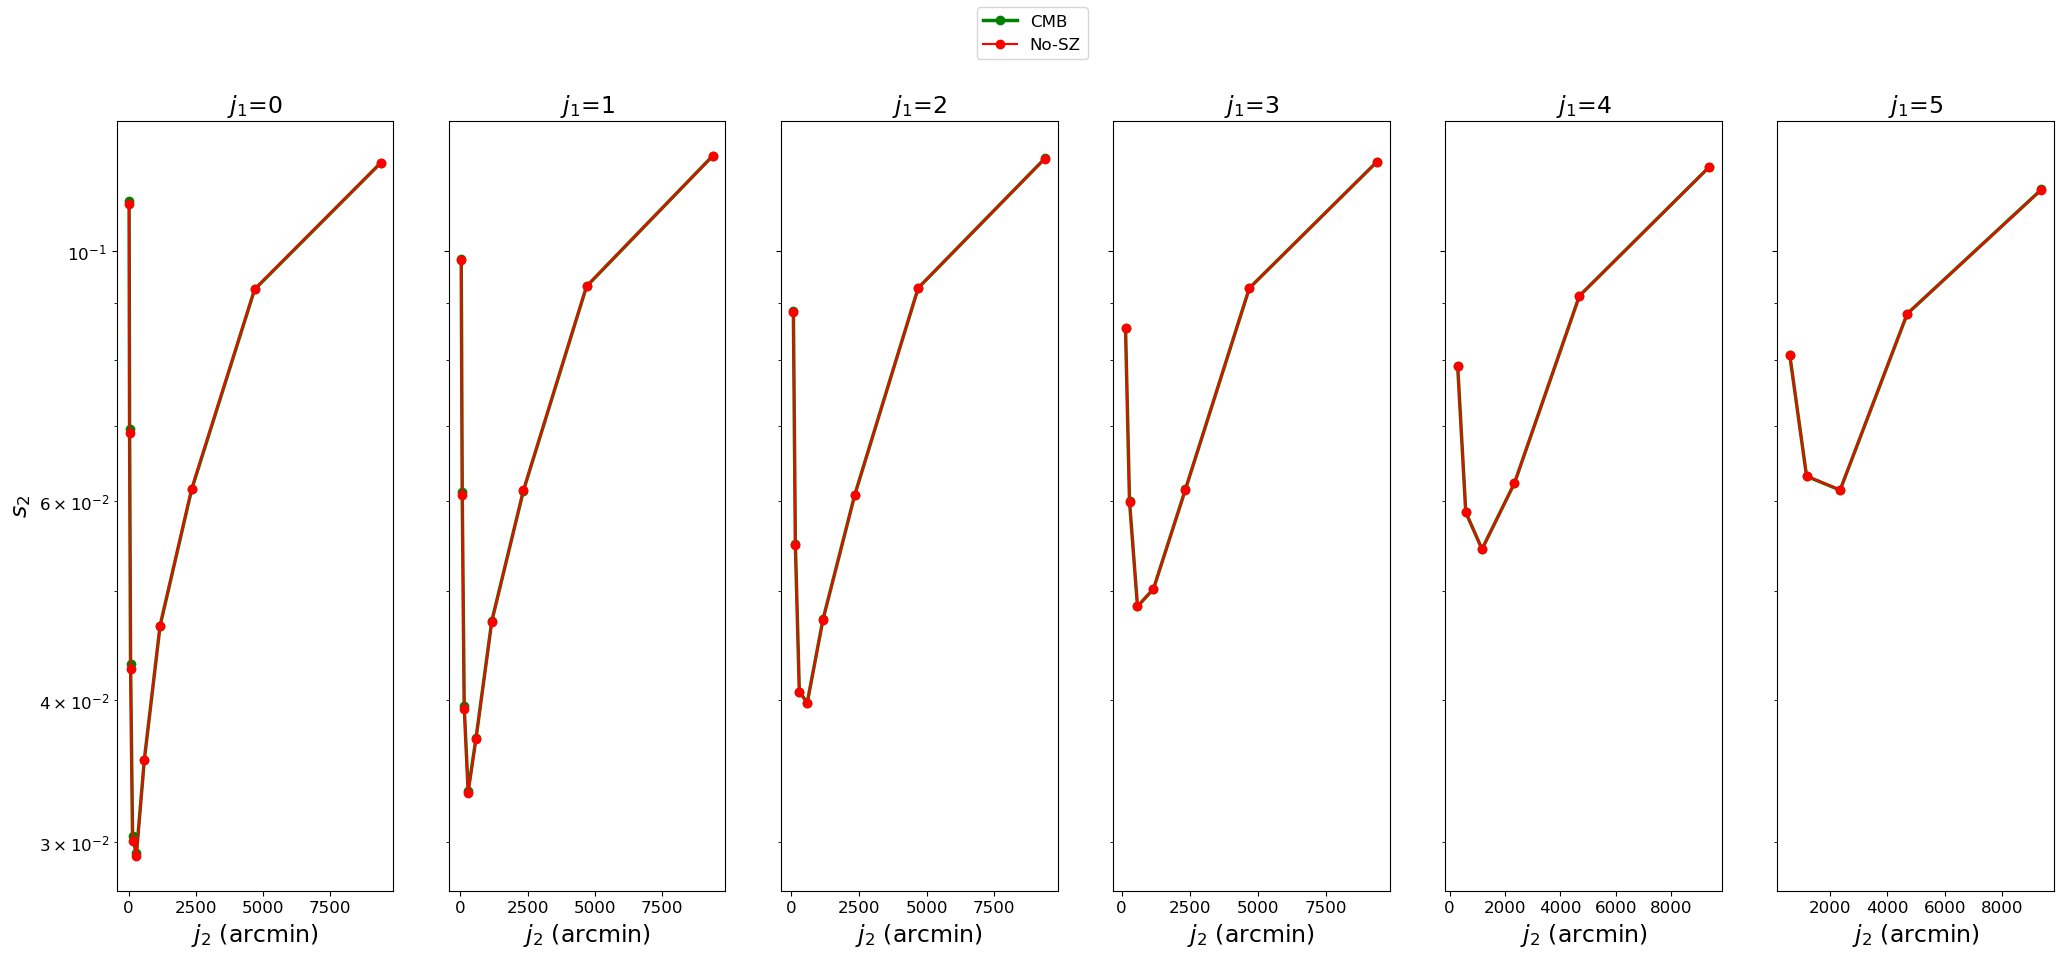

In [31]:
fig, ax = plt.subplots(1, 6,sharey=True,squeeze=True,figsize=(25,10))
for j in range (6):
    ax[j].plot (scale[j+1:],cmb_s2_sz[j,j+1:]/cmb_s1_sz[j],'o-' , color = "green" , lw = 2.5)
    ax[j].plot (scale[j+1:],nosz_s2_sz[j,j+1:]/nosz_s1_sz[j],'o-' , color = "red" , lw = 1.5)
    #ax[j].plot (scale[j+1:],websky_s2[j,j+1:]/websky_s1[j],'o-' , color = "tab:purple" , lw = 2.5)
    #ax[j].plot (scale[j+1:],magneicum_s2[j,j+1:]/magneicum_s1[j],'o-' , color = "darkorange" ,lw = 2.5)
    #ax[j].plot (scale[j+1:],mat_s2[j,j+1:]/mat_s1[j],'o-' , color = "pink" ,lw = 2.5)
    #ax[j].plot (scale,milca_s2[j,:]/milca_s1[j],'o-', alpha = 0.4 , color = "tab:cyan")
    #ax[j].plot (scale,nilc_s2[j,:]/nilc_s1[j],'o-' ,alpha = 0.4, color = "olivedrab" )
    #ax[j].plot (scale,websky_s2[j,:]/websky_s1[j],'o-' , alpha = 0.4 , color = "tab:purple")
    #ax[j].plot (scale,magneicum_s2[j,:]/magneicum_s1[j],'o-' ,  alpha = 0.4, color = "darkorange")
    ax[j].set_title(r"$j_1$=%d"%j)
    ax[j].set_xlabel(r"$j_2$ (arcmin)")
    ax[j].set_yscale('log')
ax[0].set_ylabel(r"$s_2$" )
fig.legend (["CMB","No-SZ"], loc='upper center')
plt.savefig("SZ_sim_S2.pdf")

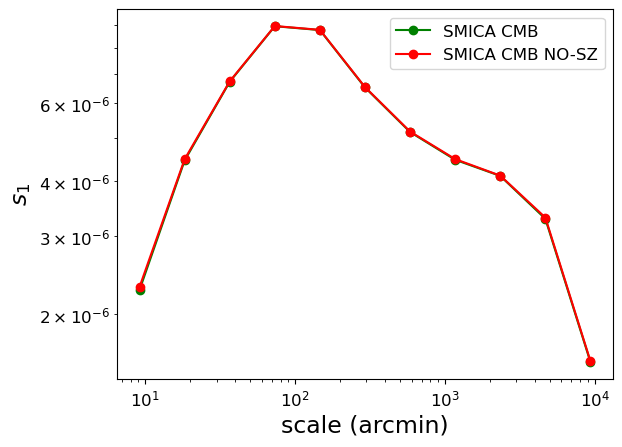

In [30]:
plt.loglog(scale, np.abs(cmb_s1_sz), 'o-', lw=1.5 , color = "green")
plt.loglog(scale, np.abs(nosz_s1_sz), 'o-', lw=1.5 , color = "red")
#plt.loglog(ellsc ,cmb_cl*ell*(ell+1)/(2*np.pi) , color = "green")
#plt.loglog(ellsc ,nosz_cl*ell*(ell+1)/(2*np.pi) , color = "red")
plt.ylabel(r"$s_1$")
plt.xlabel("scale (arcmin)")
plt.legend (["SMICA CMB","SMICA CMB NO-SZ"])